In [1]:
import set_jupyter_env
from apiServer import *
import pandas as pd 

In [2]:
API = ApiServer()

In [3]:
API.showJsons()


Distributed Configuration Files
--------------------

0.	dc_10w_14d_8r_3s_10c_synt.json
1.	dc_12w_12c_13d_4s_4r_tiles_rr.json
2.	dc_5d_4c_4s_4r_12w.json
3.	dc_AEC_1d_2c_1s_4r_4w.json
4.	dc_EEG_18d_12c_6s_10r_12w_RR.json
5.	dc_EEG_18d_9c_3s_5r_9w_RR.json
6.	dc_EEG_1d_1c_3s_2r_3w_RR.json
7.	dc_EEG_4d_3c_3s_2r_3w.json
8.	dc_EEG_8d_1c_3s_2r_3w_RR.json
9.	dc_EEG_8d_3c_3s_2r_3w.json
10.	dc_EEG_8d_3c_3s_2r_3w_RR.json
11.	dc_EEG_8d_3c_3s_2r_3w_demo_RR.json
12.	dc_EEG_8d_3c_3s_5r_3w_RR.json
13.	dc_EEG_8d_8c_3s_5r_8w_RR.json
14.	dc_FedTorchTest_5d_2s_2r_4c_4w.json
15.	dc_dist_14d.json
16.	dc_dist_2d_3c_2s_3r_6w.json
17.	dc_fed_dist_14d.json
18.	dc_fed_dist_2d_3c_2s_3r_6w.json
19.	dc_fed_synt_1d_2c_2r_1s_4w_1ws.json
20.	dc_mnist_13d_12w_4r_3s_3tokens.json
21.	dc_mnist_4w_5d_4r_4s_rr.json
22.	dc_synt_8d_8w_2c_4s_4r.json
23.	dc_synt_8d_8w_4c_6r_4s.json
24.	dc_synt_distributed_w5_c3_6r_3s_3d.json
25.	dc_test_synt_1d_2c_1s_4r_4w.json
26.	dc_test_synt_1d_2c_2s_4r_4w.json

Connection Map Files
-------

In [4]:
dc = 6
conn = 24
exp = 1
API.setJsons(dc , conn , exp)

In [5]:
dc_path , conn_path , exp_path = API.getUserJsons()

In [6]:
exp_name = "EEG_Emotion_confusion_Matrix_test"
API.initialization(exp_name, dc_path, conn_path, exp_path)

[INFO][2024-08-07 11:49:17,439] 
Network components:
                 Receiver's Address: http://10.0.0.11:8901
                 Frequency: 100 [batches/sec]
                 Batchsize: 5 [samples]
                 devicesIp: ['10.0.0.11']
                 mainServerIp: 10.0.0.11
                 mainServerPort: 8900
                 apiServerIp: 10.0.0.11
                 apiServerPort: 8901
                 Clients: ['c1']
                 Workers: ['w1', 'w2', 'w3']
                 Sources: ['s1', 's2', 's3']
                 Routers: ['r1', 'r2']
[INFO][2024-08-07 11:49:17,440] Connections:
[INFO][2024-08-07 11:49:17,441] 		 r1 : ['mainServer', 'c1', 'r2']
[INFO][2024-08-07 11:49:17,441] 		 r2 : ['s1', 's2', 's3', 'r1']
[INFO][2024-08-07 11:49:17,442] Experiment name: EEG_Valence_Recognition_DEAP
[INFO][2024-08-07 11:49:17,442] Batch size: 5
[INFO][2024-08-07 11:49:17,443] Number of features: 70
[INFO][2024-08-07 11:49:17,444] Number of labels: 9
[INFO][2024-08-07 11:49:17,444] 
[

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-08-07 11:49:19,468] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***


In [7]:
API.send_jsons_to_devices()

[INFO][2024-08-07 11:49:19,765] Sending distributed configurations to devices is completed


In [8]:
API.run_current_experiment_phase()

[INFO][2024-08-07 11:49:19,770] Experiment phase: training_phase of type training starts running...
[INFO][2024-08-07 11:49:19,772] Sending data to sources
[INFO][2024-08-07 11:49:20,428] Data is ready in sources
[INFO][2024-08-07 11:49:20,429] Phase training requested from Main Server
[INFO][2024-08-07 11:49:47,417] Processing experiment phase data
[INFO][2024-08-07 11:49:47,419] Processing experiment phase data completed
[INFO][2024-08-07 11:49:47,420] Start generating communication statistics for training_phase of type training
[INFO][2024-08-07 11:49:47,421] Statistics requested from Main Server
[INFO][2024-08-07 11:49:47,828] Statistics received from Main Server
[INFO][2024-08-07 11:49:47,829] Phase of training_phase training completed


In [9]:
stats = API.get_experiment_flow(exp_name).generate_stats()

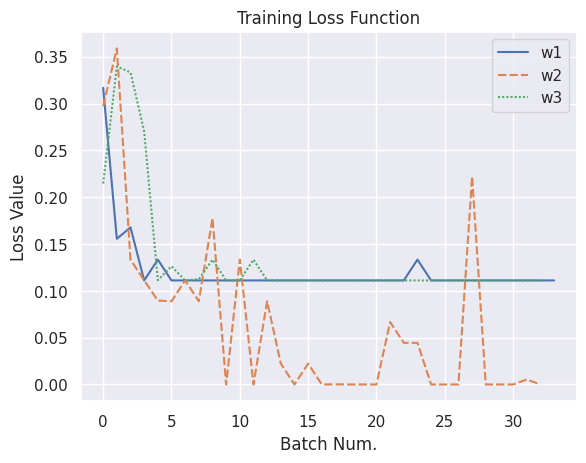

In [10]:
loss_ts = stats.get_loss_ts(plot=True)

In [11]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-08-07 11:49:48,166] Experiment phase: prediction_phase of type prediction starts running...
[INFO][2024-08-07 11:49:48,168] Sending data to sources
[INFO][2024-08-07 11:49:48,863] Data is ready in sources
[INFO][2024-08-07 11:49:48,864] Phase prediction requested from Main Server
[INFO][2024-08-07 11:49:54,936] Processing experiment phase data
[INFO][2024-08-07 11:49:54,939] Processing experiment phase data completed
[INFO][2024-08-07 11:49:54,940] Start generating communication statistics for prediction_phase of type prediction
[INFO][2024-08-07 11:49:54,941] Statistics requested from Main Server
[INFO][2024-08-07 11:49:55,346] Statistics received from Main Server
[INFO][2024-08-07 11:49:55,348] Phase of prediction_phase prediction completed


In [12]:
stats_pred = API.get_experiment_flow(exp_name).generate_stats()

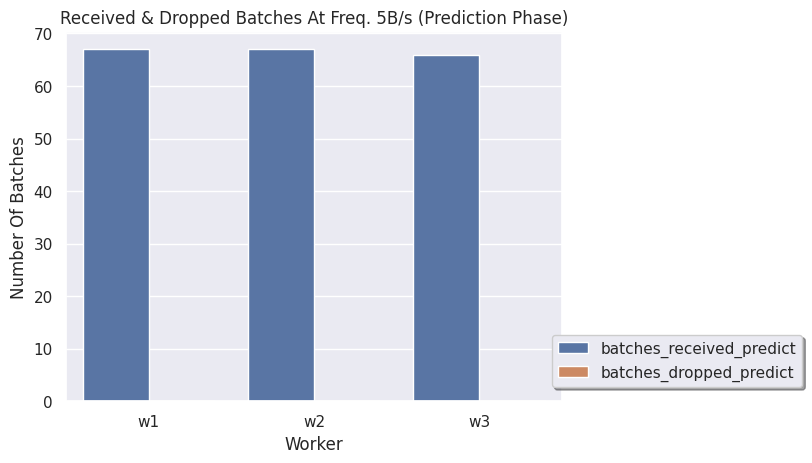

In [13]:
import pandas as pd
workers_comm_dict = stats_pred.get_communication_stats_workers()
df_pred = pd.DataFrame.from_dict(workers_comm_dict)
plt.figure()
df_selected_pred = df_pred.iloc[[4,6]]
data_pred = pd.melt(df_selected_pred.reset_index(), id_vars=['index'], value_vars=df_pred.columns)
batches_stats = sns.barplot(x='variable', y='value', hue='index', data=data_pred)
plt.ylabel('Number Of Batches')
plt.xlabel('Worker')
plt.title("Received & Dropped Batches At Freq. 5B/s (Prediction Phase)")

batches_stats.legend(loc='upper right', bbox_to_anchor=(1.5, 0.2), shadow=True, ncol=1)
plt.show()

In [14]:
print(stats_pred.get_recieved_batches())

{'phase:prediction_phase,s1->w1': [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99, 102, 105, 108, 111, 114, 117, 120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156, 159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195, 198], 'phase:prediction_phase,s1->w3': [2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32, 35, 38, 41, 44, 47, 50, 53, 56, 59, 62, 65, 68, 71, 74, 77, 80, 83, 86, 89, 92, 95, 98, 101, 104, 107, 110, 113, 116, 119, 122, 125, 128, 131, 134, 137, 140, 143, 146, 149, 152, 155, 158, 161, 164, 167, 170, 173, 176, 179, 182, 185, 188, 191, 194, 197], 'phase:prediction_phase,s1->w2': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 79, 82, 85, 88, 91, 94, 97, 100, 103, 106, 109, 112, 115, 118, 121, 124, 127, 130, 133, 136, 139, 142, 145, 148, 151, 154, 157, 160, 163, 166, 169, 172, 175, 178, 181, 184, 187, 190, 193, 196, 199]}


In [15]:
print(stats_pred.get_missed_batches())

{}


In [ ]:
_ , conf_mats_workers = stats_pred.get_confusion_matrices_new(plot = True)

tensor_data [[0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]]
tensor_data [[0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]]
tensor_data [[0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]]
tensor_data [[0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]]
tensor_data [[0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]]
tensor_data [[0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0.]]
tensor_data [[0. 0. 0.